In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ResNet

In [27]:
# Config
csv_files = {
    "resnet_adam_lr2_dropout15": "results/history_resnet_adam_lr2_dropout15_bn.csv",
    "resnet_adam_lr3_dropout0": "results/history_resnet_adam_lr3_dropout0_bn.csv",
    "resnet_adam_lr3_dropout15": "results/history_resnet_adam_lr3_dropout15_bn.csv",
    "resnet_adam_lr3_dropout20": "results/history_resnet_adam_lr3_dropout20_bn.csv",
    "resnet_sgd_mom09_lr3_dropout15": "results/history_resnet_sgd_mom09_lr3_dropout15_bn.csv"
}

In [28]:
baseline_f1 = 0.0336
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
model_histories = {name: pd.read_csv(path) for name, path in csv_files.items()}

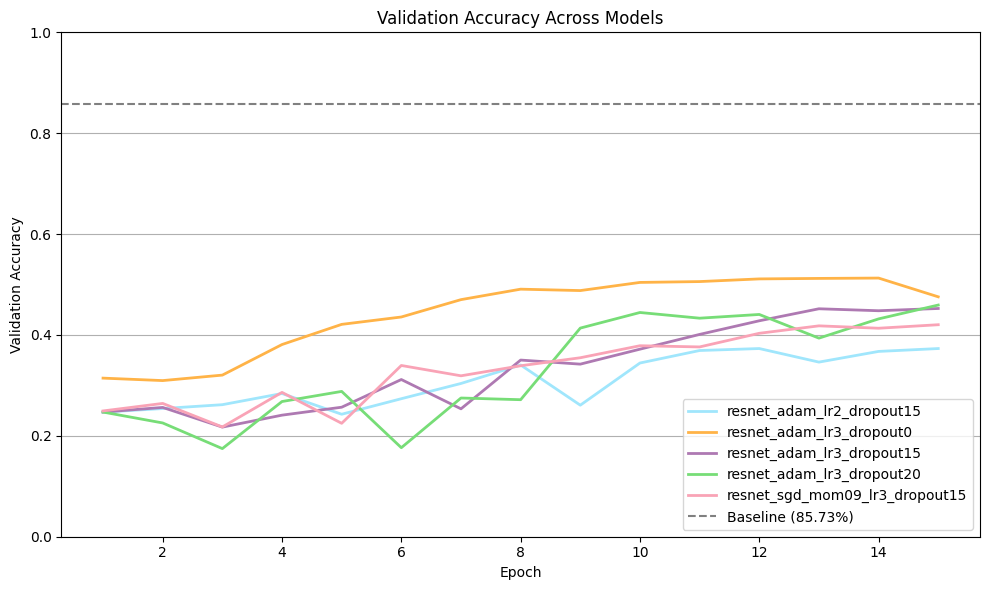

In [29]:
pastel_colors = ["#a0e6fc", '#FFB347', "#AE79B2", '#77DD77', "#F9A3B6"]  # adjust length if needed

plt.figure(figsize=(10, 6))

for color, (name, df) in zip(pastel_colors, model_histories.items()):
    plt.plot(df['epoch'], df['val_acc'], label=name, color=color, linewidth=2)

plt.axhline(y=0.8573, color='gray', linestyle='--', label='Baseline (85.73%)')
plt.title("Validation Accuracy Across Models")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.ylim(0, 1)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.savefig("results/resnet_val_accuracy_comparison.png")
plt.show()

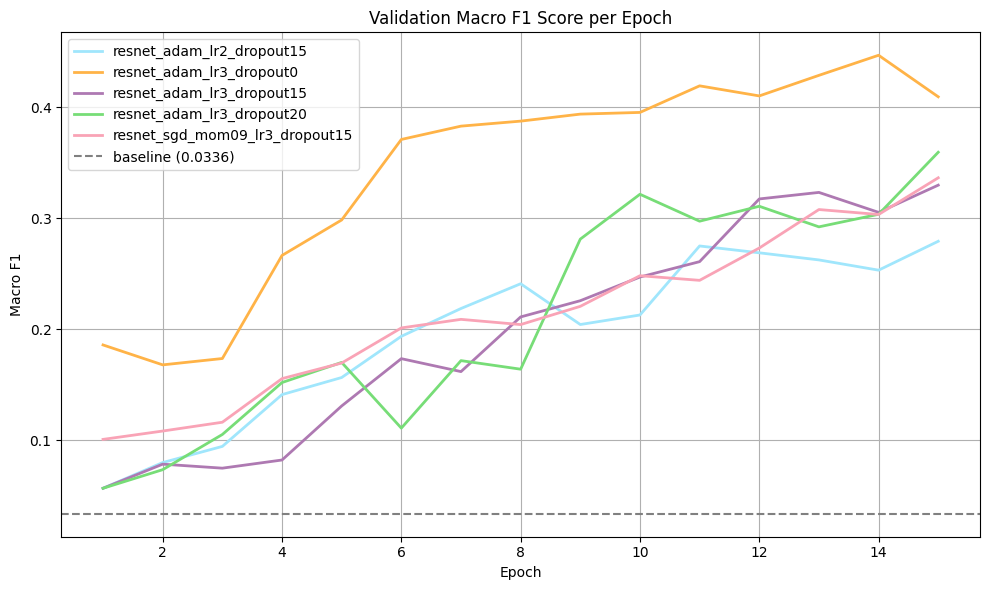

In [30]:
pastel_colors = ["#a0e6fc", '#FFB347', "#AE79B2", '#77DD77', "#F9A3B6"]  # adjust length if needed

# Plot macro F1 over epochs with baseline
plt.figure(figsize=(10, 6))
for color, (name, df) in zip(pastel_colors, model_histories.items()):
    plt.plot(df["epoch"], df["val_f1_macro"], label=name, color=color, linewidth=2)

plt.axhline(y=baseline_f1, color='gray', linestyle='--', label='baseline (0.0336)')
plt.title("Validation Macro F1 Score per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Macro F1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("results/resnet_macro_f1_comparison.png")
plt.show()

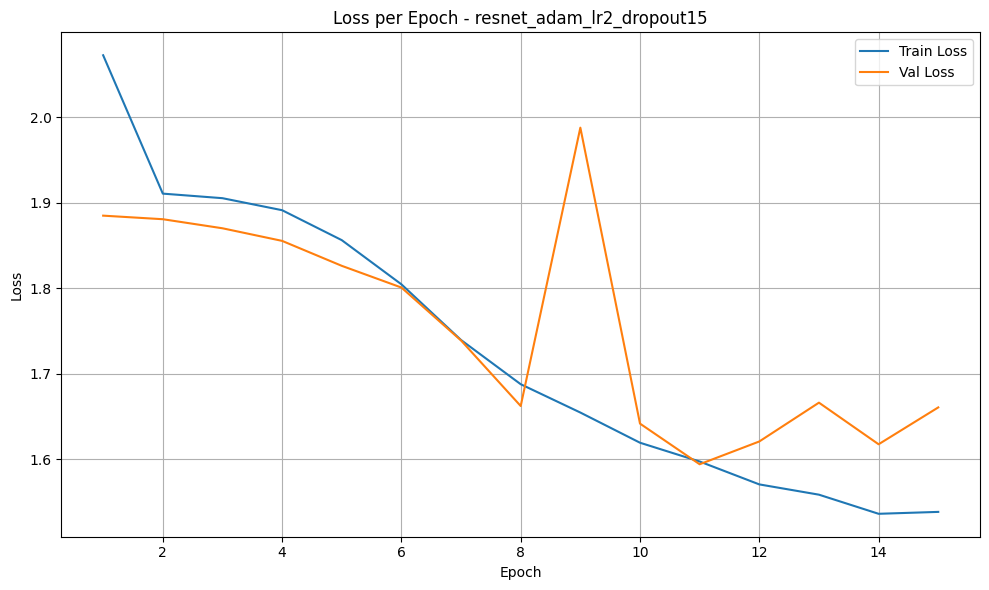

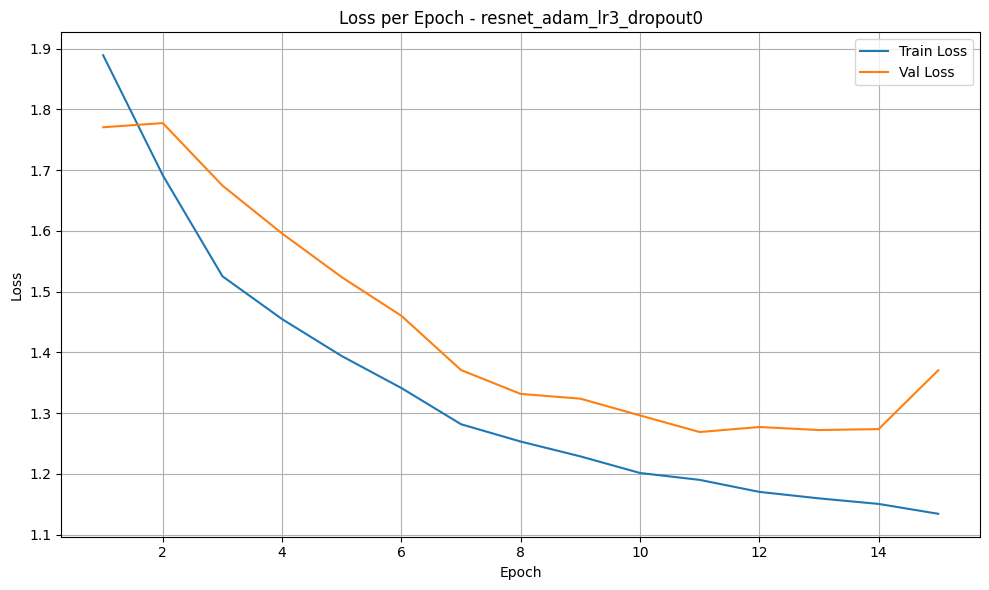

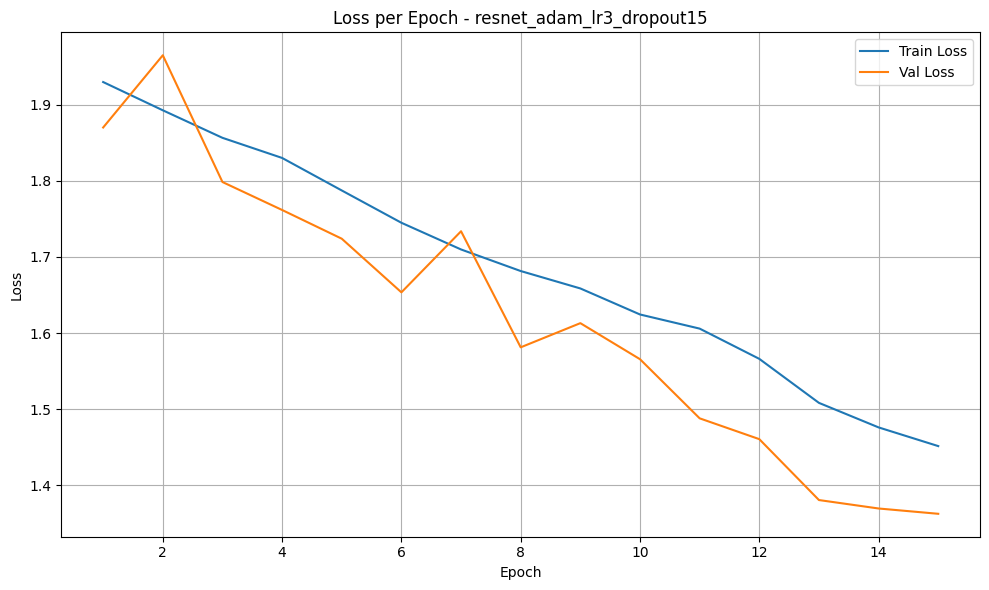

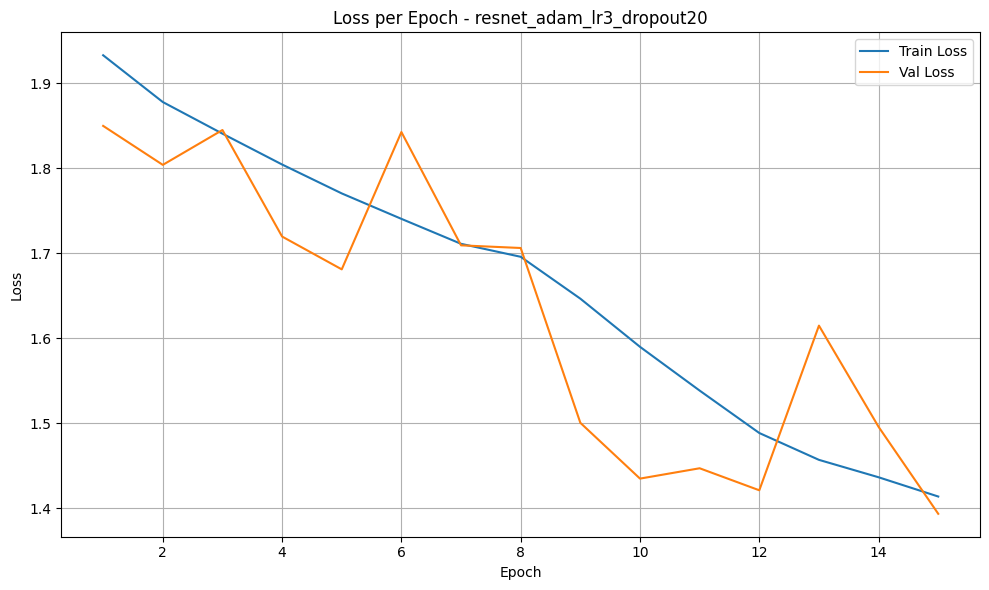

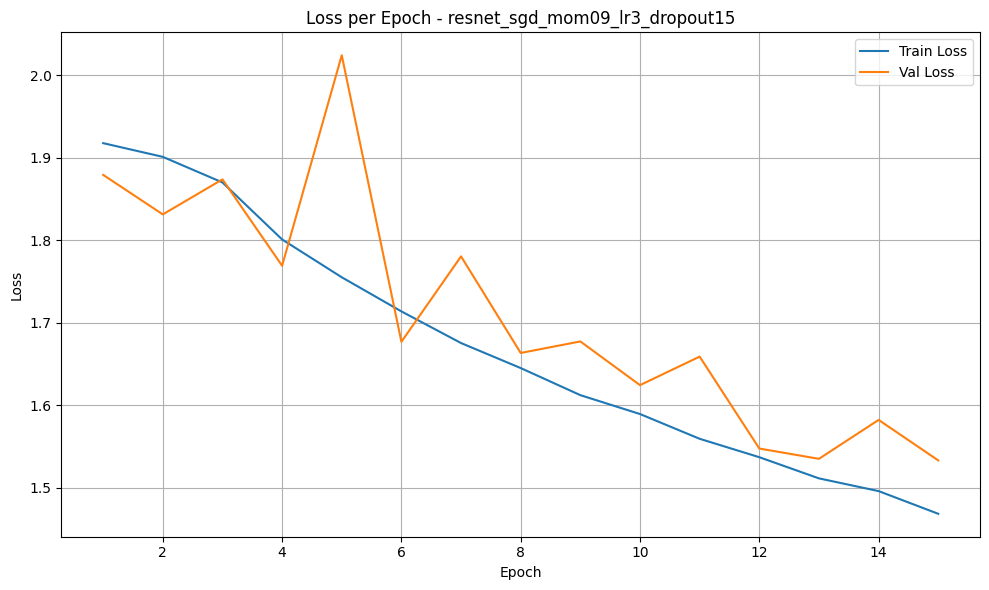

In [31]:
# Train & Val Loss per model
for name, df in model_histories.items():
    plt.figure(figsize=(10, 6))
    plt.plot(df["epoch"], df["train_loss"], label="Train Loss")
    plt.plot(df["epoch"], df["val_loss"], label="Val Loss")
    plt.title(f"Loss per Epoch - {name}")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"results/loss_curve_{name}.png")
    plt.show()

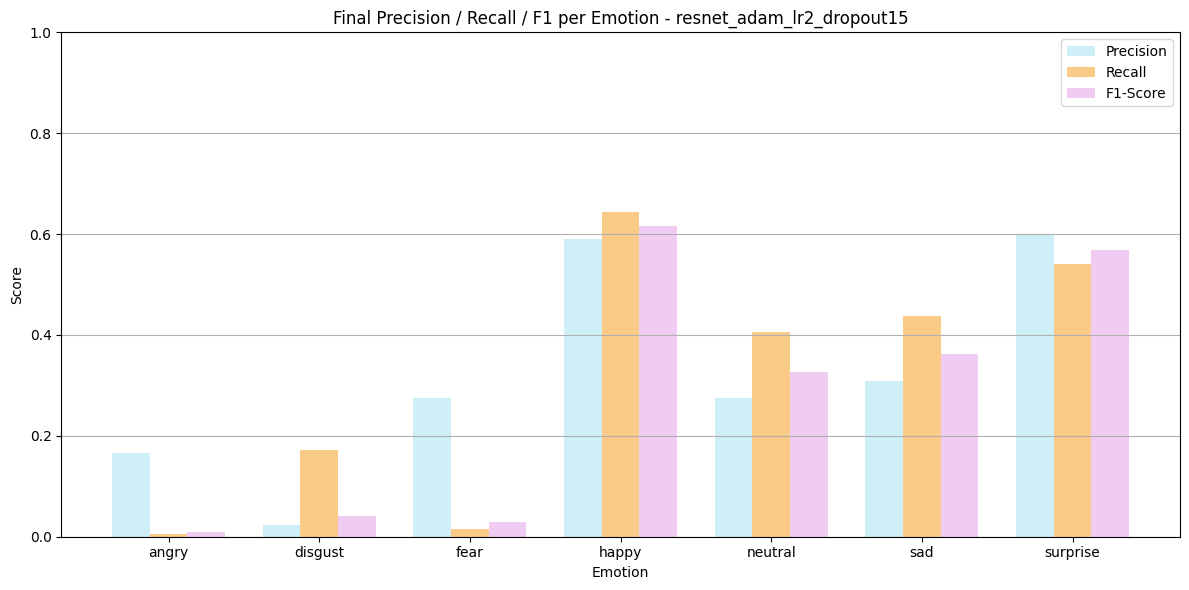

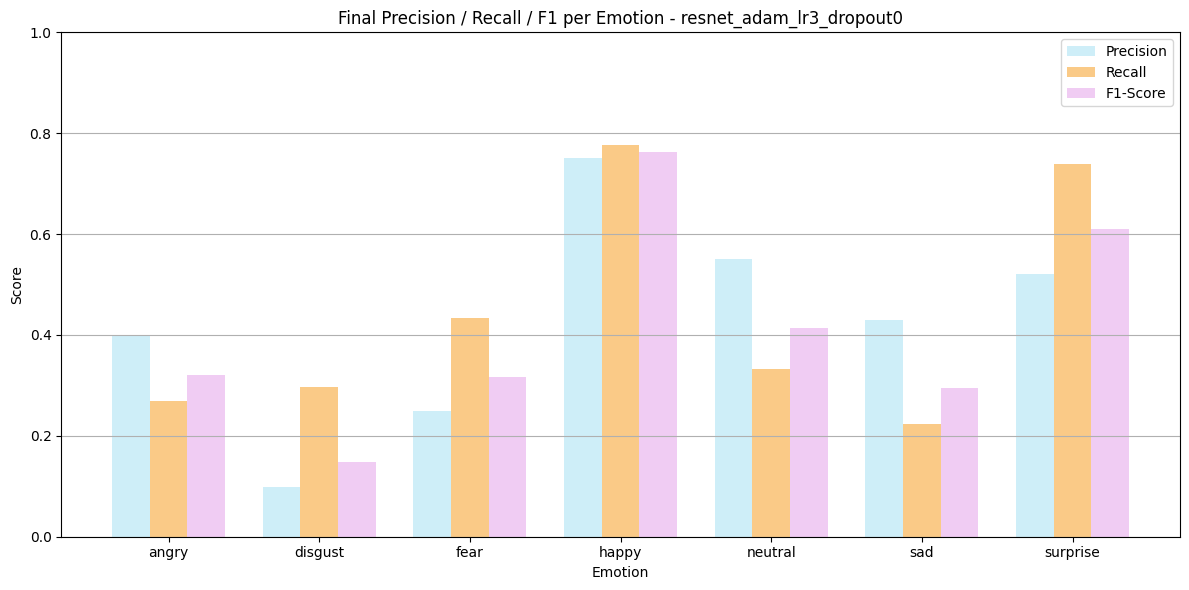

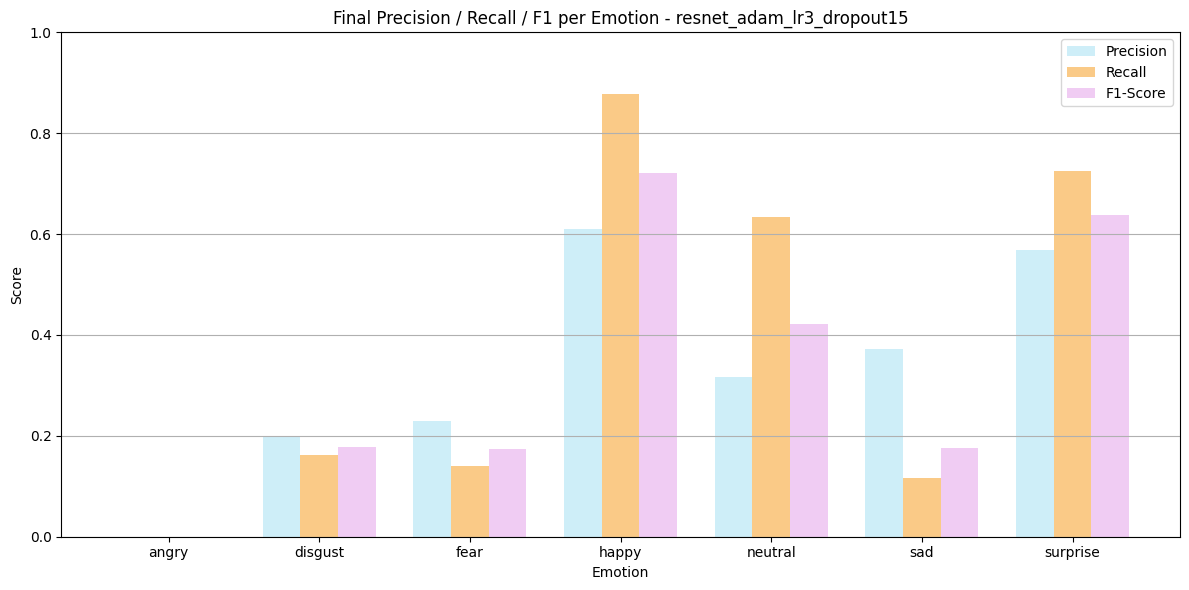

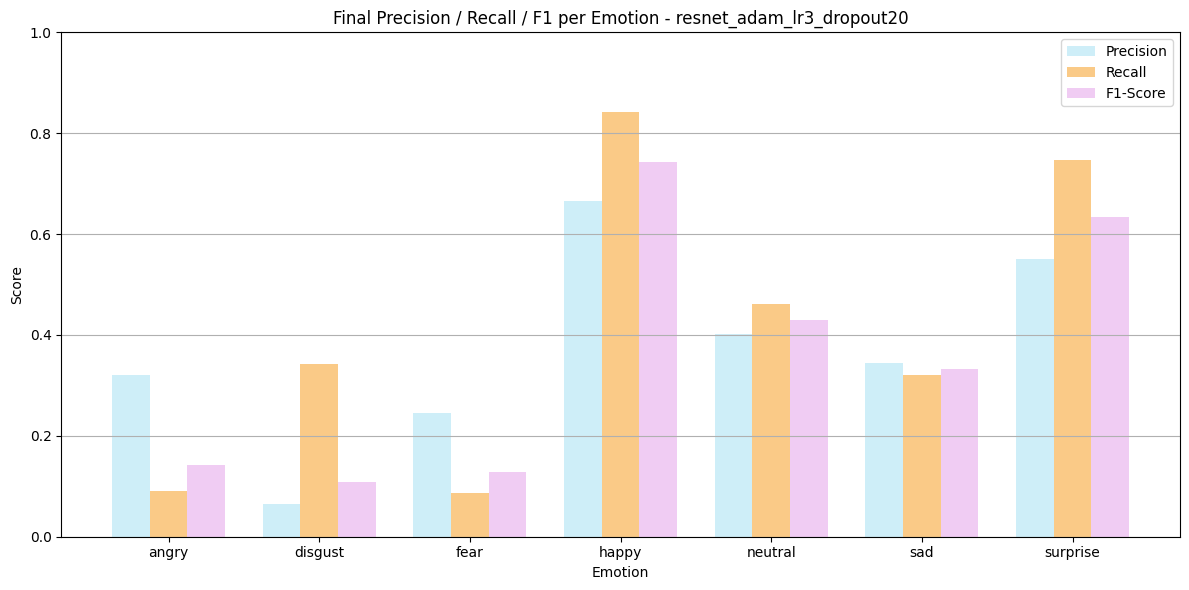

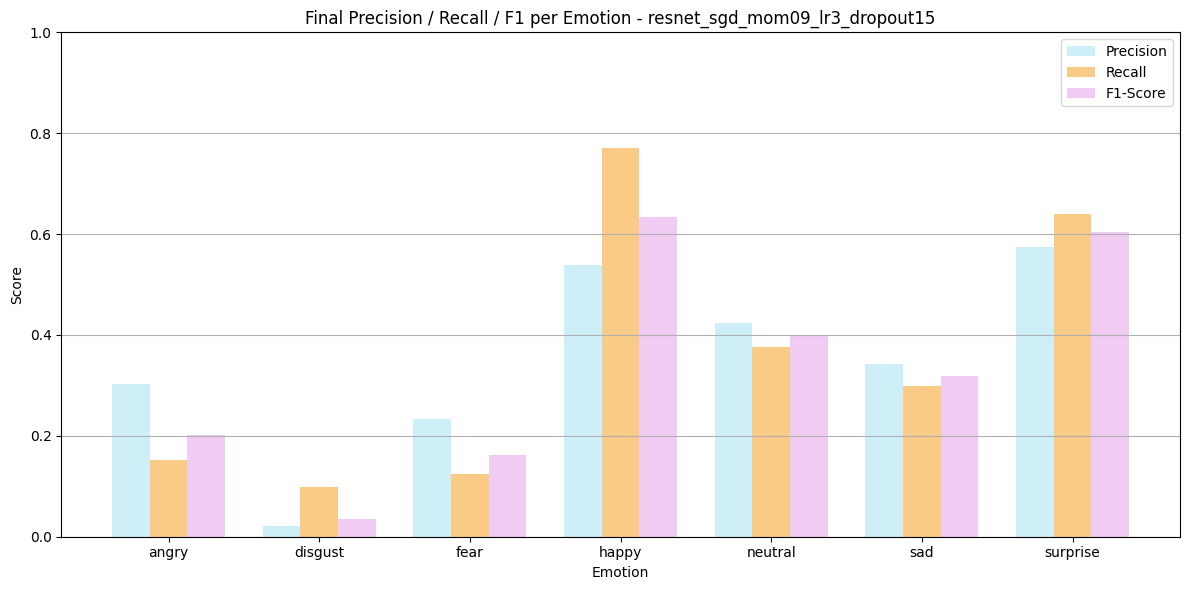

In [32]:
# Final F1 / Precision / Recall per emotion per model
for name, df in model_histories.items():
    last_epoch = df.iloc[-1]
    precisions = [last_epoch[f"{emo}_precision"] for emo in emotion_labels]
    recalls = [last_epoch[f"{emo}_recall"] for emo in emotion_labels]
    f1s = [last_epoch[f"{emo}_f1-score"] for emo in emotion_labels]

    x = range(len(emotion_labels))
    width = 0.25

    # Pastel colors
    pastel_precision = "#ceeef8"  # pastel blue
    pastel_recall = "#FACA87"     # pastel orange
    pastel_f1 = "#F0CCF3"         # pastel purple

    plt.figure(figsize=(12, 6))
    plt.bar([i - width for i in x], precisions, width=width, label="Precision", color=pastel_precision)
    plt.bar(x, recalls, width=width, label="Recall", color=pastel_recall)
    plt.bar([i + width for i in x], f1s, width=width, label="F1-Score", color=pastel_f1)

    plt.xticks(ticks=x, labels=emotion_labels)
    plt.title(f"Final Precision / Recall / F1 per Emotion - {name}")
    plt.xlabel("Emotion")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f"results/emotion_metrics_{name}.png")
    plt.show()